# Simple Symmetric Random Walk

Let's first simulate the path of simple symmetric random walk (SSRW) denoted $\left\{S_n\right\}$. By definition, $S_0 = 0,\forall n\geq 1,S_n = \xi_1 + ...+ \xi_n$ where $\xi_1,\xi_2,...$ are $i.i.d.$ increments taking $\pm 1$ with probability $\frac{1}{2}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Path Simulation

In [7]:
# The following function returns a single path of SSRW until some given time
def get_SSRW_path(end_time):
    # Sample the i.i.d. increments
    SSRW_incr = np.random.choice([-1, 1], p = [0.5, 0.5], size = end_time)
    
    # Calculate the cumulative sum as the path of SSRW
    SSRW_path = np.cumsum(SSRW_incr)
    
    # Add 0 to the front since 
    SSRW_path = np.insert(SSRW_path, 0, 0)
    
    return SSRW_path

In [9]:
# Test the function with time 0 to 100
SSRW_path = get_SSRW_path(100)
print(SSRW_path)

[ 0 -1  0  1  0  1  0  1  2  3  4  3  4  5  4  5  6  5  4  5  4  5  6  5
  6  5  6  7  6  7  8  7  6  7  6  7  6  5  6  7  6  7  8  7  6  7  8  9
 10 11 10  9  8  9  8  9  8  9 10 11 12 11 10 11 10 11 12 13 14 13 12 13
 12 13 14 13 12 11 10 11 12 13 12 13 12 13 14 13 12 11 10  9  8  9  8  7
  8  7  8  7  8]


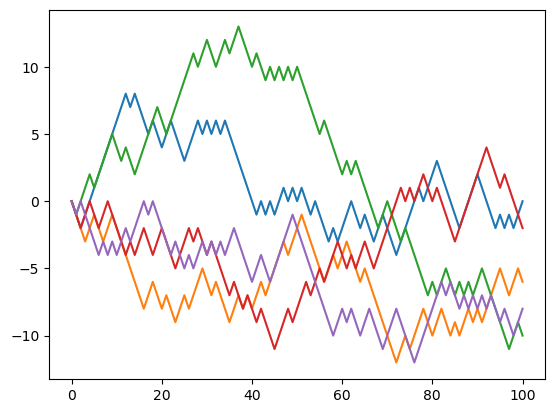

In [10]:
# Plot 5 SSRW paths from time 0 to 100
for _ in range(5):
    SSRW_path = get_SSRW_path(100)
    plt.plot(SSRW_path)

## Distribution of $S_n$

Simulate a lot of SSRW paths and build up a histogram for the values of $S_n$ to see its empirical distribution. Here we still take $n = 100$.

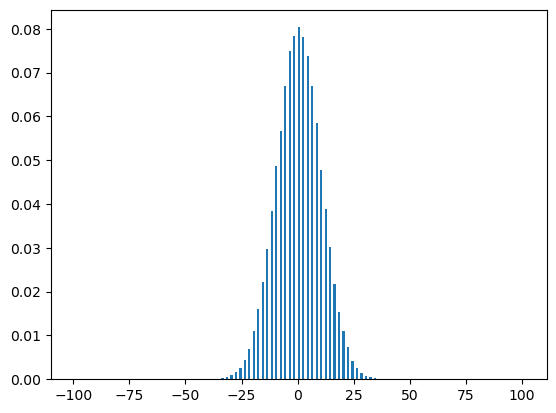

In [39]:
# Collect the values at time 100 for each path
val_list = list()
n = 100

# Simulate 100000 paths
for _ in range(100000):
    SSRW_path = get_SSRW_path(n)
    val_list.append(SSRW_path[n])

# Make histogram, the bins shall correspond to the support of S_n with width 1
# Notice that bins must be of width 1 such that the values of y-axis in histogram can be interpreted as likelihood.
# bins = [-n, -n + 1, ..., n - 1, n, n + 1]
_ = plt.hist(val_list, bins = np.arange(-n,n + 2), density = True)

We want to compare this histogram with the true distribution of $S_n$. Recall that after proper transformations, $S_n$ follows a binomial distribution.

In detail, $\frac{\xi_1 + 1}{2},\frac{\xi_2 + 1}{2},...\overset{i.i.d.}{\sim} B\left(1,\frac{1}{2}\right)$ so their sum 
$$\sum_{i=1}^n\frac{\xi_i + 1}{2} = \frac{1}{2} (S_n + n) \sim B\left(n,\frac{1}{2}\right)$$
as a result,
$$\mathbb{P}(S_n = k) = \text{PMF}_{B\left(n,\frac{1}{2}\right)}\left(\frac{n+k}{2}\right)$$

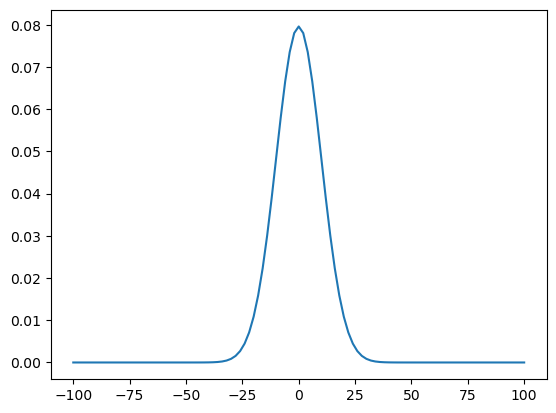

In [35]:
import scipy
from scipy.stats import binom

# Set up r.v. with parameter specified
binom_rv = binom(n, 0.5)

# The support of S_n is {-n, -n + 2,..., n - 2, n}
supp = np.arange(-n,n + 2,2)

# Get the pmf value at each point
pmf_val = binom_rv.pmf((n + supp) / 2)
plt.plot(supp,pmf_val)

Draw in the same plot to compare empirical distribution with the true theoretical distribution of $S_n$.

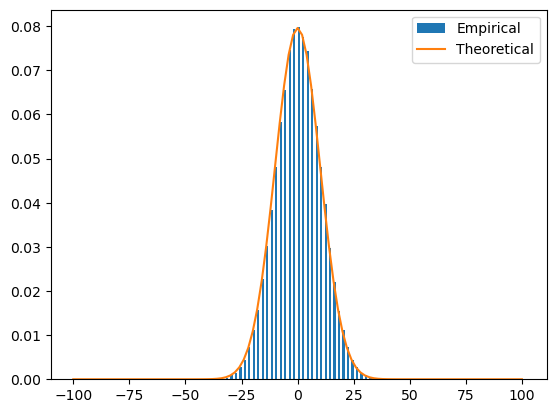

In [38]:
_ = plt.hist(val_list, bins = np.arange(-n,n + 2), density = True, label = 'Empirical')
plt.plot(supp,pmf_val, label = 'Theoretical')
plt.legend()

The two distributions fit very well, which is what we expect to see.

With Monte Carlo techniques, we can find the distribution of any random variable that is built based on the SSRW (try it on your own). For example, the first hitting time of SSRW to some level $k$ denoted $T_k$, the $i$-th hitting time of SSRW to some level $k$ denoted $T_k^i$. One should be able to see that the simulation results match well with the theoretical results when a large enough number of simulations are made.